In [417]:
#import libraries 
import pandas as pd
import numpy as nm
natural_gas = pd.read_csv("C:/Users/shrad/Desktop/pro/Natural Gas Futures Historical Data.csv") 

In [418]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns; sns.set()

In [419]:
# Load libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [420]:
natural_gas.shape

(5000, 7)

In [421]:
natural_gas


,Date,Price,Open,High,Low,Vol.,Change %
0,08/23/2019,2.152,2.150,2.167,2.120,81.62K,-0.32%
1,08/22/2019,2.159,2.169,2.195,2.145,113.11K,-0.51%
2,08/21/2019,2.170,2.214,2.238,2.157,193.53K,-2.16%
3,08/20/2019,2.218,2.202,2.231,2.187,107.84K,0.36%
4,08/19/2019,2.210,2.164,2.221,2.134,144.76K,0.45%
...,...,...,...,...,...,...,...
4995,01/10/2000,2.216,2.180,2.255,2.165,28.92K,1.98%
4996,01/07/2000,2.173,2.195,2.230,2.155,28.46K,-1.05%
4997,01/06/2000,2.196,2.165,2.220,2.135,29.07K,1.29%
4998,01/05/2000,2.168,2.180,2.200,2.125,27.95K,-0.37%


In [422]:
#to remove percentage character from change column
natural_gas['Change %'] = list(map(lambda x: x[:-1], natural_gas['Change %'].values))

In [423]:
#to change from string to float datatype
natural_gas['Change %'] = [float(x) for x in natural_gas['Change %'].values]


In [424]:
#user defined function to set output to 1 if change% is positive or else 0
def output_stat(value):
	if value< 0.0:
		return "0"
	elif value >0.0:
		return "1"

natural_gas['output_stat'] = natural_gas['Change %'].map(output_stat)
display(natural_gas.head())


,Date,Price,Open,High,Low,Vol.,Change %,output_stat
0,08/23/2019,2.152,2.150,2.167,2.120,81.62K,-0.32,0
1,08/22/2019,2.159,2.169,2.195,2.145,113.11K,-0.51,0
2,08/21/2019,2.170,2.214,2.238,2.157,193.53K,-2.16,0
3,08/20/2019,2.218,2.202,2.231,2.187,107.84K,0.36,1
4,08/19/2019,2.210,2.164,2.221,2.134,144.76K,0.45,1


In [425]:
natural_gas.head()

,Date,Price,Open,High,Low,Vol.,Change %,output_stat
0,08/23/2019,2.152,2.150,2.167,2.120,81.62K,-0.32,0
1,08/22/2019,2.159,2.169,2.195,2.145,113.11K,-0.51,0
2,08/21/2019,2.170,2.214,2.238,2.157,193.53K,-2.16,0
3,08/20/2019,2.218,2.202,2.231,2.187,107.84K,0.36,1
4,08/19/2019,2.210,2.164,2.221,2.134,144.76K,0.45,1


In [426]:
natural_gas. dropna( inplace = True )


In [427]:
# convert the k to thousands
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
   
    return 0.0

natural_gas['Vol.'] = natural_gas['Vol.'].apply(value_to_float)

In [428]:
natural_gas.head()

,Date,Price,Open,High,Low,Vol.,Change %,output_stat
0,08/23/2019,2.152,2.150,2.167,2.120,81620.0,-0.32,0
1,08/22/2019,2.159,2.169,2.195,2.145,113110.0,-0.51,0
2,08/21/2019,2.170,2.214,2.238,2.157,193530.0,-2.16,0
3,08/20/2019,2.218,2.202,2.231,2.187,107840.0,0.36,1
4,08/19/2019,2.210,2.164,2.221,2.134,144760.0,0.45,1


In [430]:
#convert the data type to float from string
natural_gas['Vol.'] = pd.to_numeric(natural_gas['Vol.'])
print(natural_gas.dtypes)

Date            object
Price          float64
Open           float64
High           float64
Low            float64
Vol.           float64
Change %       float64
output_stat     object
dtype: object


In [431]:
#converting string date to date-time
import datetime as dt
natural_gas['Date'] =pd.to_datetime(natural_gas['Date'])
natural_gas.head()

,Date,Price,Open,High,Low,Vol.,Change %,output_stat
0,2019-08-23,2.152,2.150,2.167,2.120,81620.0,-0.32,0
1,2019-08-22,2.159,2.169,2.195,2.145,113110.0,-0.51,0
2,2019-08-21,2.170,2.214,2.238,2.157,193530.0,-2.16,0
3,2019-08-20,2.218,2.202,2.231,2.187,107840.0,0.36,1
4,2019-08-19,2.210,2.164,2.221,2.134,144760.0,0.45,1


In [432]:
#converting date-time to ordinal
import datetime as dt
import time
natural_gas['Date']= natural_gas['Date'].map(dt.datetime.toordinal)
natural_gas.head()

,Date,Price,Open,High,Low,Vol.,Change %,output_stat
0,737294,2.152,2.150,2.167,2.120,81620.0,-0.32,0
1,737293,2.159,2.169,2.195,2.145,113110.0,-0.51,0
2,737292,2.170,2.214,2.238,2.157,193530.0,-2.16,0
3,737291,2.218,2.202,2.231,2.187,107840.0,0.36,1
4,737290,2.210,2.164,2.221,2.134,144760.0,0.45,1


In [433]:
natural_gas.tail()

,Date,Price,Open,High,Low,Vol.,Change %,output_stat
4995,730129,2.216,2.180,2.255,2.165,28920.0,1.98,1
4996,730126,2.173,2.195,2.230,2.155,28460.0,-1.05,0
4997,730125,2.196,2.165,2.220,2.135,29070.0,1.29,1
4998,730124,2.168,2.180,2.200,2.125,27950.0,-0.37,0
4999,730123,2.176,2.130,2.200,2.130,30150.0,-6.57,0


In [330]:
#independent variable [open,high, low,vol, change%]
#dependent variable [output_stat ]
xrn = natural_gas.iloc[:,2:7]
yrn= natural_gas.iloc[:,1]

In [434]:
yrn


0       2.152
1       2.159
2       2.170
3       2.218
4       2.210
        ...  
4995    2.216
4996    2.173
4997    2.196
4998    2.168
4999    2.176
Name: Price, Length: 4900, dtype: float64

In [332]:
y

1       0
2       1
3       0
4       0
5       0
       ..
1336    1
1337    0
1338    0
1339    0
1340    0
Name: output_stat, Length: 1268, dtype: object

In [435]:
#naive bayes algorithm , data set is splitted , trained , fitted and then predicted using classifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)

In [436]:
#accuracy is calculated over training and testing set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('ac', format(accuracy_score(y_train, y_pred)))
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))


ac 0.5205047318611987
Accuracy score:  0.8974763406940063


Text(0.5, 0, 'date')

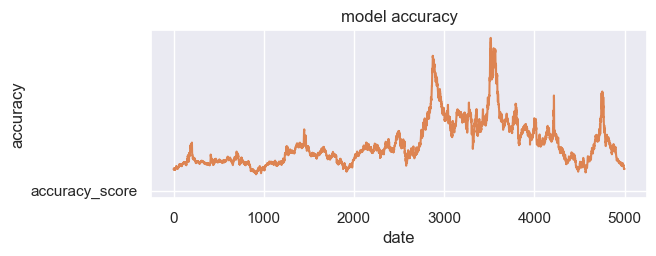

In [437]:
plot.subplot(2,1,1)
plot.plot(['accuracy_score'])
plot.plot(natural_gas['Price'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('date')


In [438]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[303  21]
 [ 44 266]]


<AxesSubplot: title={'center': 'Confusion matrix'}>

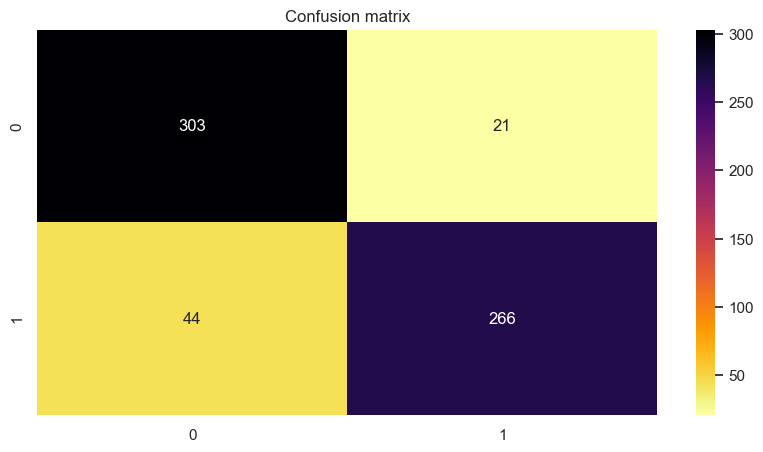

In [439]:
#plotting the confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion matrix')
sns.heatmap(cm,annot=True,fmt='d',cmap='inferno_r')

In [440]:
#importing logistic regression classifier
from sklearn.linear_model import LogisticRegression

In [339]:
# splitting the dataset 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.3,random_state=1)

In [340]:
logmodel = LogisticRegression()

In [341]:
#fitting the model
logmodel.fit(x_train1, y_train1)

LogisticRegression()

In [342]:
#predicting the model
predictions = logmodel.predict(x_test1)

In [441]:
from sklearn.metrics import classification_report

In [442]:
classification_report(y_test1, predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98       197\n           1       0.98      0.97      0.98       184\n\n    accuracy                           0.98       381\n   macro avg       0.98      0.98      0.98       381\nweighted avg       0.98      0.98      0.98       381\n'

In [443]:
accuracy_score(y_test1, predictions)

0.979002624671916

In [444]:
from sklearn.ensemble import RandomForestClassifier

In [347]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.3,random_state=1)

In [348]:
#creating a randomFOrestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(x_train2,y_train2)

RandomForestClassifier(n_jobs=2, random_state=0)

In [349]:
#apply the trained classifier to test data
clf.predict(x_test2)

array(['0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1',
       '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1',
       '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0',
       '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0',
       '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1',
       '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0

In [377]:
#RNN is used to predict the price 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [378]:
regressor = Sequential()


In [445]:
xrn.shape

(4900, 5)

In [446]:
x_train3

,Open,High,Low,Vol.,Change %
2240,4.400,4.450,4.327,124910.0,-0.27
4999,2.130,2.200,2.130,30150.0,-6.57
1665,4.390,4.397,4.251,125560.0,-3.20
1594,3.472,3.488,3.418,91380.0,-0.78
455,3.175,3.194,3.008,317430.0,-4.84
...,...,...,...,...,...
2987,7.685,7.751,7.570,43760.0,-0.64
2855,9.311,9.350,9.049,79990.0,-1.39
956,2.397,2.495,2.377,163910.0,3.78
4077,4.680,4.720,4.620,27330.0,-1.70


In [447]:
y_train3.shape

(3430,)

In [406]:
#since RNN needs sequential data, the first 70% is used for training, next 30% is used for testing
x_train4= xrn[0:3430]
y_train4= yrn[0:3430]
x_test4=xrn[3430:4900]
y_test4= yrn[3430:4900]

In [389]:
x_train4

,Open,High,Low,Vol.,Change %
0,2.150,2.167,2.120,81620.0,-0.32
1,2.169,2.195,2.145,113110.0,-0.51
2,2.214,2.238,2.157,193530.0,-2.16
3,2.202,2.231,2.187,107840.0,0.36
4,2.164,2.221,2.134,144760.0,0.45
...,...,...,...,...,...
3519,13.745,15.100,13.735,41870.0,9.45
3520,13.500,13.975,13.500,32550.0,1.56
3521,13.532,13.830,13.300,29750.0,-1.25
3522,13.901,14.450,13.610,34840.0,-1.95


In [391]:
#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train3.shape[1], 1)))
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train4.shape[1], 1)))

regressor.add(Dropout(0.2))

In [392]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [393]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [394]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [395]:
regressor.add(Dense(units = 1))


In [397]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [360]:
x_train3

,Open,High,Low,Vol.,Change %
2240,4.400,4.450,4.327,124910.0,-0.27
4999,2.130,2.200,2.130,30150.0,-6.57
1665,4.390,4.397,4.251,125560.0,-3.20
1594,3.472,3.488,3.418,91380.0,-0.78
455,3.175,3.194,3.008,317430.0,-4.84
...,...,...,...,...,...
2987,7.685,7.751,7.570,43760.0,-0.64
2855,9.311,9.350,9.049,79990.0,-1.39
956,2.397,2.495,2.377,163910.0,3.78
4077,4.680,4.720,4.620,27330.0,-1.70


In [398]:
regressor.fit(x_train4, y_train4, epochs = 100, batch_size = 32)


Epoch 1/100
108/108 [==============================] - 12s 23ms/step - loss: 5.6866
Epoch 2/100
108/108 [==============================] - 3s 28ms/step - loss: 0.5108
Epoch 3/100
108/108 [==============================] - 2s 21ms/step - loss: 0.4092
Epoch 4/100
108/108 [==============================] - 2s 22ms/step - loss: 0.3230
Epoch 5/100
108/108 [==============================] - 2s 22ms/step - loss: 0.3091
Epoch 6/100
108/108 [==============================] - 2s 22ms/step - loss: 0.2759
Epoch 7/100
108/108 [==============================] - 3s 28ms/step - loss: 0.2443
Epoch 8/100
108/108 [==============================] - 2s 22ms/step - loss: 0.2106
Epoch 9/100
108/108 [==============================] - 2s 23ms/step - loss: 0.1999
Epoch 10/100
108/108 [==============================] - 2s 23ms/step - loss: 0.2200
Epoch 11/100
108/108 [==============================] - 3s 24ms/step - loss: 0.1894
Epoch 12/100
108/108 [==============================] - 3s 24ms/step - loss: 0.1896


108/108 [==============================] - 3s 26ms/step - loss: 0.1163
Epoch 99/100
108/108 [==============================] - 3s 27ms/step - loss: 0.1265
Epoch 100/100
108/108 [==============================] - 8s 73ms/step - loss: 0.1064


In [399]:
real_stock_price = natural_gas.iloc[:, 1:2].values

In [400]:
real_stock_price

array([[2.152],
       [2.159],
       [2.17 ],
       ...,
       [2.196],
       [2.168],
       [2.176]])

In [407]:
predicted_stock_price = regressor.predict(x_test4)
predicted_stock_price

46/46 [==============================] - 0s 5ms/step


array([[13.457545 ],
       [13.095582 ],
       [12.511808 ],
       ...,
       [ 2.0819323],
       [ 2.0730393],
       [ 2.0327508]], dtype=float32)

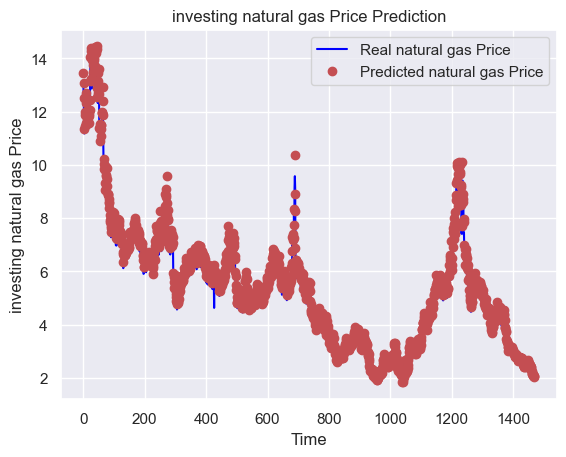

In [409]:
plt.plot(real_stock_price[3430:4900], color = 'blue', label = 'Real natural gas Price')
plt.plot(predicted_stock_price, 'ro', label = 'Predicted natural gas Price')
plt.title('investing natural gas Price Prediction')
plt.xlabel('Time')
plt.ylabel('investing natural gas Price')
plt.legend()
plt.show()

In [366]:
2**2**2**2

65536

In [367]:
2**16

65536

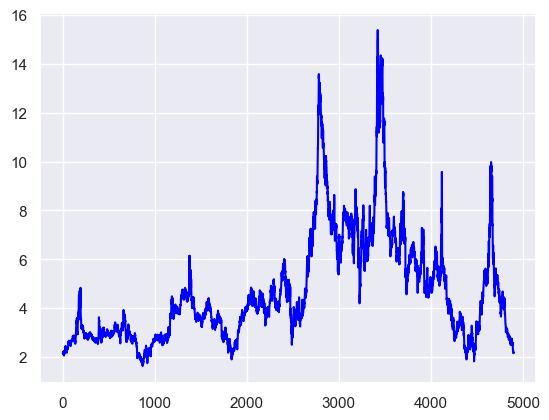

In [368]:
plt.plot(real_stock_price, color = 'blue', label = 'Real natural gas Price')